# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,precision_recall_curve, average_precision_score
import joblib

# Load Raw Credit Card Dataset

In [2]:
DATA_ROW=r"D:\FinTech_Fraud_Detection_Project\data\raw\creditcard.csv"
data=pd.read_csv(DATA_ROW)
print("Shape of the data: ",data.shape)

Shape of the data:  (284807, 31)


# Display Initial & Final Rows

In [3]:
display(data.head())
display(data.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Dataset Summary (Info)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Statistical Summary of Numerical Features

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Missing values and duplicates

In [6]:
print("Missing values per column:")
print(data.isnull().sum(),"\n")
print("Total Missing Value in Data: ",data.isnull().sum().sum())

dups = data.duplicated().sum()
print("\nDuplicate rows:", dups)

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64 

Total Missing Value in Data:  0

Duplicate rows: 1081


# Remove Duplicate Rows

In [7]:
data = data.drop_duplicates()
print("Shape of the Data: ",data.shape)
print("Duplicate Rows in Data: ",data.duplicated().sum())

Shape of the Data:  (283726, 31)
Duplicate Rows in Data:  0


# Analyze target Distribution

In [8]:
data["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

# Class Imbalance Visualization(Pie Chart)

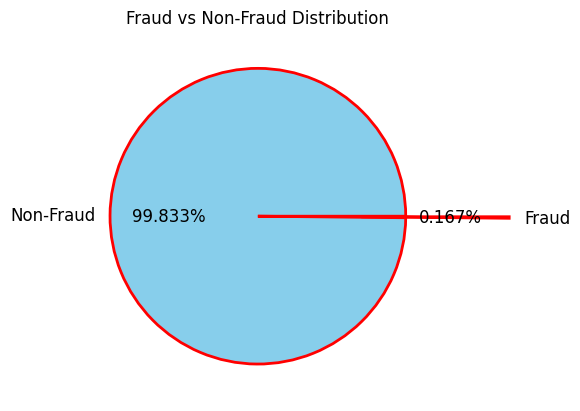

In [9]:
data['Class'].value_counts().plot.pie(
    autopct='%1.3f%%',
    labels=['Non-Fraud', 'Fraud'],textprops={'color':'black','fontsize':12},
    explode=[0, 0.7],colors=['skyblue','red'],wedgeprops={'linewidth':2,'edgecolor':'red'}
)
plt.title("Fraud vs Non-Fraud Distribution")
plt.ylabel("")
plt.show()

# Top Correlated Features Heatmap 

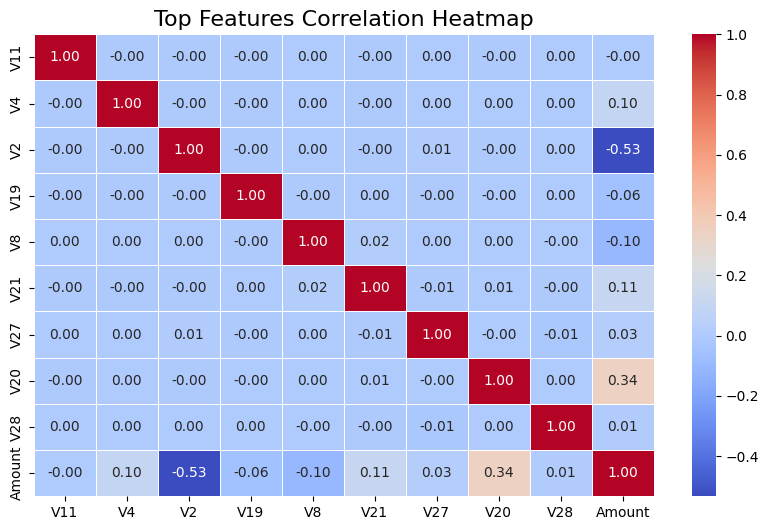

In [10]:
corr_matrix = data.corr()
target_corr = corr_matrix['Class'].sort_values(ascending=False)
top_features = target_corr[1:11].index  # Top 10 features excluding 'Class'

# Step 5: Plot clean heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    data[top_features].corr(),   # Only top correlated features
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Top Features Correlation Heatmap", fontsize=16)
plt.show()


# Amount Feature Boxplot (Outlier Analysis)

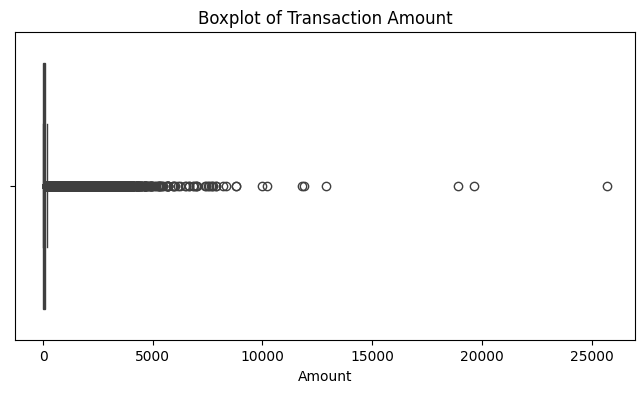

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(data= data,x=data['Amount'])
plt.title("Boxplot of Transaction Amount")
plt.show()

# PCA Visualization

In [13]:
cov_matrix = np.cov(scaled_data.T)
print(cov_matrix)

[[ 1.00000352e+00  1.17927019e-01 -1.05556091e-02 -4.22055298e-01
  -1.05845266e-01  1.73223622e-01 -6.32795606e-02  8.53354816e-02
  -3.82032608e-02 -7.86150101e-03  3.10682091e-02 -2.48536833e-01
   1.25500672e-01 -6.59583436e-02 -1.00316396e-01 -1.84392635e-01
   1.12864689e-02 -7.38194717e-02  9.03057437e-02  2.95368073e-02
  -5.10216986e-02  4.59128252e-02  1.43727760e-01  5.14742482e-02
  -1.59543231e-02 -2.33262461e-01 -4.18184723e-02 -5.17143465e-03
  -9.30501634e-03 -1.05588710e-02]
 [ 1.17927019e-01  1.00000352e+00  6.87495976e-03 -8.11184076e-03
   2.25733560e-03 -7.03604056e-03  4.12837141e-04 -9.17311274e-03
  -1.16827356e-03  1.82804627e-03  8.15224262e-04  1.02808925e-03
  -1.52374826e-03 -5.67544591e-04 -2.66279834e-03 -6.02479586e-04
  -3.34541968e-03 -3.49098813e-03 -3.53524257e-03  9.19210869e-04
  -1.39290057e-03  2.81753261e-03 -1.43625686e-03 -1.33043473e-03
  -7.23047378e-04 -2.22492226e-04 -6.83661850e-04 -1.57062471e-02
  -4.86059770e-03 -2.30106114e-01]
 [-1.0

In [14]:
pca = PCA()
pca.fit(scaled_data)


PCA()

In [15]:
explained_variance = pca.explained_variance_ratio_

num_pcs = len(explained_variance)
print(num_pcs)

30


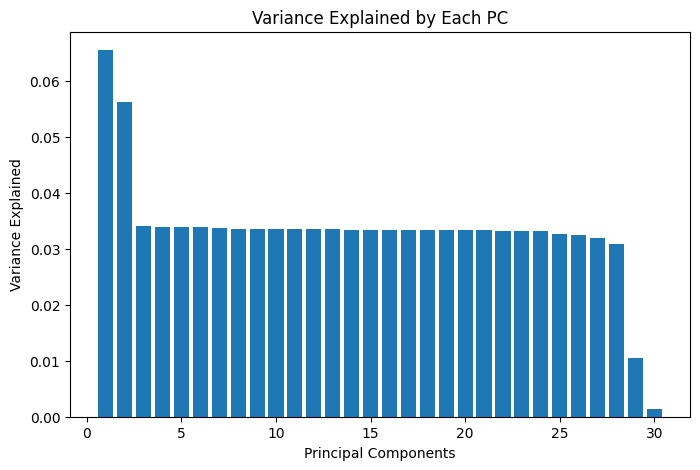

In [16]:
plt.figure(figsize=(8,5))
plt.bar(range(1,31), explained_variance)
plt.xlabel("Principal Components")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by Each PC")
plt.show()

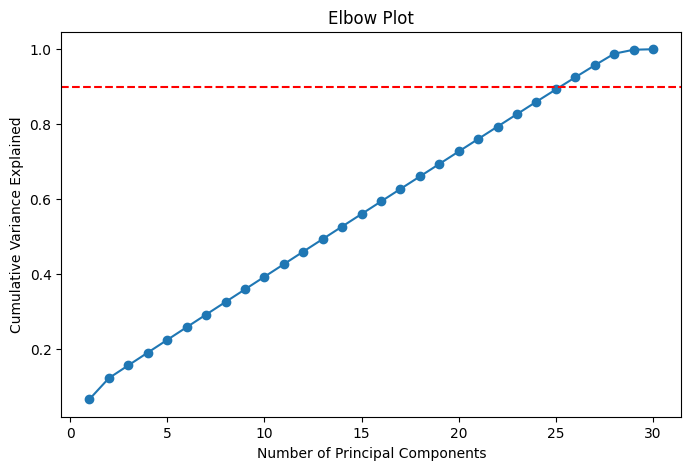

In [19]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 31),
         np.cumsum(explained_variance),
         marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Elbow Plot")
plt.axhline(y=0.9, color='r', linestyle='--')
plt.show()


# T-SNE

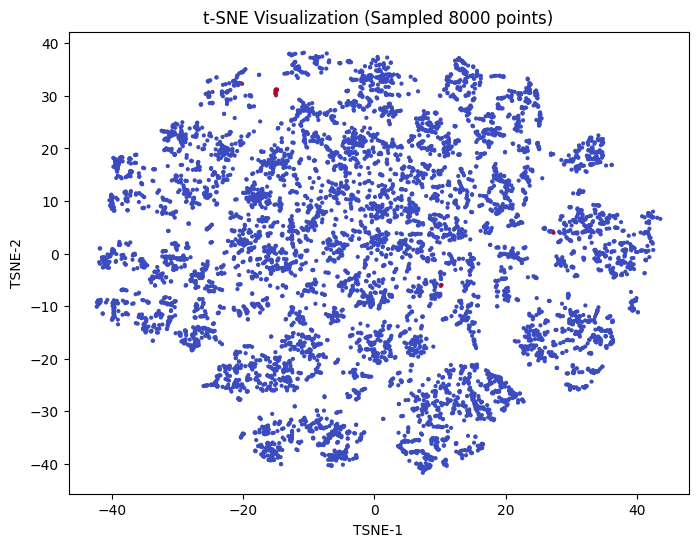

In [17]:

sample_data = data.sample(8000, random_state=42)


scaler_tsne = StandardScaler()
scaled_sample = scaler_tsne.fit_transform(sample_data.drop("Class", axis=1))


tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30, max_iter=500)
tsne_result = tsne.fit_transform(scaled_sample)


plt.figure(figsize=(8,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1], c=sample_data["Class"], cmap="coolwarm", s=4)
plt.title("t-SNE Visualization (Sampled 8000 points)")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.show()

# Isolation Forest

Isolation Forest Fraud Predictions:
0    283158
1       568
Name: count, dtype: int64
[[282781    472]
 [   377     96]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.17      0.20      0.18       473

    accuracy                           1.00    283726
   macro avg       0.58      0.60      0.59    283726
weighted avg       1.00      1.00      1.00    283726



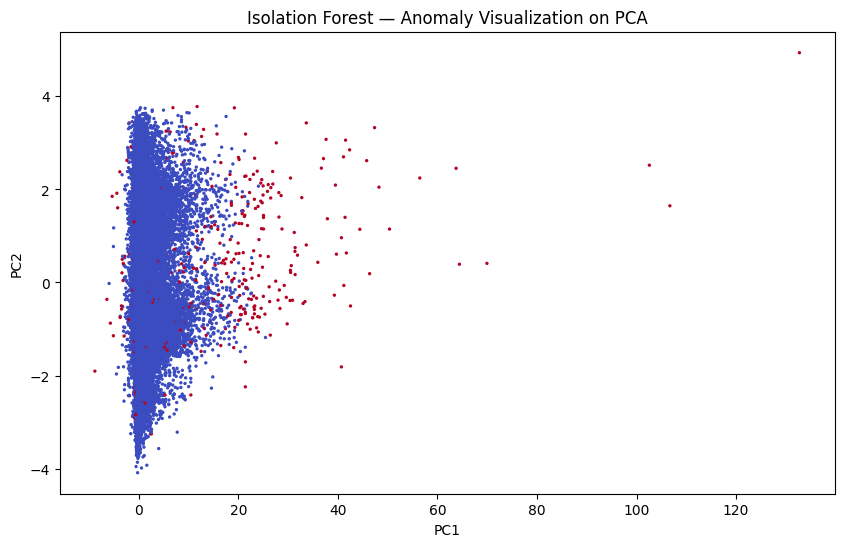

In [17]:
y = data['Class']
iso = IsolationForest(contamination=0.002, random_state=42)
iso_pred = iso.fit_predict(scaled_data)

iso_labels = (iso_pred == -1).astype(int)

print("Isolation Forest Fraud Predictions:")
print(pd.Series(iso_labels).value_counts())
print(confusion_matrix(y, iso_labels))
print(classification_report(y, iso_labels))

plt.figure(figsize=(10,6))
plt.scatter(pca_res[:,0], pca_res[:,1], c=iso_labels, cmap="coolwarm", s=2)
plt.title("Isolation Forest — Anomaly Visualization on PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Train_Test_Split

In [20]:
x= data.drop('Class',axis=1)
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape

((226980, 30), (56746, 30))

# Logistic Regression with Scaling + SMOTE(Pipeline)

In [21]:
pipeline = Pipeline([("scaler",StandardScaler()),("smote",SMOTE(random_state=42)),("model",LogisticRegression(max_iter=2000))])

In [22]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=2000))])

In [23]:
y_pred = pipeline.predict(x_test)
y_proba = pipeline.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_test,y_proba)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))
print("\nAUC-ROC Score:",auc_score)

Accuracy: 0.9736721531033025

Confusion Matrix:
 [[55169  1482]
 [   12    83]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746


AUC-ROC Score: 0.9626184886409772


# Random Forest Model & Evaluation

In [24]:
rf_model = RandomForestClassifier(n_estimators= 200, max_depth = 15, random_state=42, class_weight=None)
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
y_proba = rf_model.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_test,y_proba)
print("Accuracy:",accuracy_score(y_test,rf_pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,rf_pred))
print("\nClassification Report:\n:",classification_report(y_test,rf_pred))
print("\nAUC-ROC Score:",auc_score)

Accuracy: 0.9995418179254926

Confusion Matrix: 
 [[56650     1]
 [   25    70]]

Classification Report:
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.99      0.74      0.84        95

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746


AUC-ROC Score: 0.971562261640757


# XGBoost Model & Evaluation

In [25]:
xgb_model = Pipeline([
    ("scaler", StandardScaler()),
    ("model", XGBClassifier(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.05,
        subsample=0.8,
        gamma=0.1,
        reg_lambda=1.0,
        min_child_weight=3,
        objective='binary:logistic',
        eval_metric='logloss',
        random_state=42
    ))
])
xgb_model.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=300,
                               n_jobs=None, num_parallel_tree=None, ...))])

In [26]:
xgb_pred= xgb_model.predict(x_test)
y_proba = xgb_model.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_test,y_proba)
print("Accuracy:",accuracy_score(y_test,xgb_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,xgb_pred))
print("\nClassification Report:\n",classification_report(y_test,xgb_pred))
print("\nAUC-ROC Score:",auc_score)

Accuracy: 0.9995065731505305

Confusion Matrix:
 [[56649     2]
 [   26    69]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.73      0.83        95

    accuracy                           1.00     56746
   macro avg       0.99      0.86      0.92     56746
weighted avg       1.00      1.00      1.00     56746


AUC-ROC Score: 0.9739386771636864


# Best Threshold Using F1

In [27]:
thresholds = np.arange(0.01, 1.0, 0.01)
f1_scores = []

from sklearn.metrics import f1_score

for t in thresholds:
    preds = (y_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))

best_t = thresholds[np.argmax(f1_scores)]
print("BEST threshold:", best_t)


BEST threshold: 0.29000000000000004


# Threshold Tuning for Fraud Detection

In [28]:
y_proba=xgb_model.predict_proba(x_test)[:,1]
threshold = 0.29;
y_pred_thresh = (y_proba >= threshold).astype(int)

print("Threshold:",threshold)
print("Accuracy",accuracy_score(y_test,y_pred_thresh))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred_thresh))
print("\nClassification Report\n",classification_report(y_test,y_pred_thresh))



Threshold: 0.29
Accuracy 0.9995770627004547

Confusion Matrix:
 [[56649     2]
 [   22    73]]

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.97      0.77      0.86        95

    accuracy                           1.00     56746
   macro avg       0.99      0.88      0.93     56746
weighted avg       1.00      1.00      1.00     56746



# Model-evaluation using Confusion-Matix

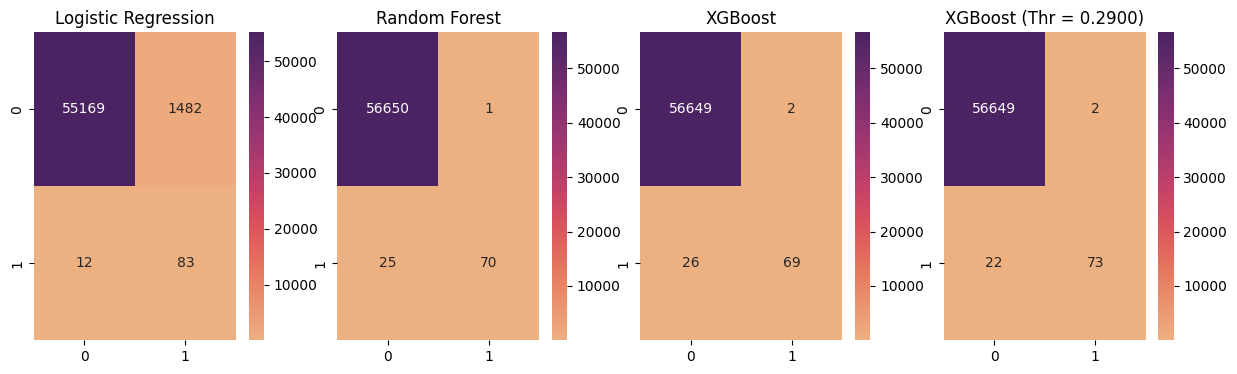

In [29]:

models = {
    "Logistic Regression": y_pred,
    "Random Forest": rf_pred,
    "XGBoost": xgb_pred,
    "XGBoost (Thr = 0.2900)":y_pred_thresh
}

plt.figure(figsize=(15,4))

for i, (name, pred) in enumerate(models.items(), 1):
    plt.subplot(1, 4, i)
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="flare")
    plt.title(name)

plt.show()


# ROC Curve Comparison (LogReg vs RF vs XGBoost)

AUC Scores:
Logistic Regression: 0.9626184886409772
Random Forest: 0.971562261640757
XGBoost: 0.9739386771636864
XGBoost (Thresh = 0.30) 0.9739386771636864


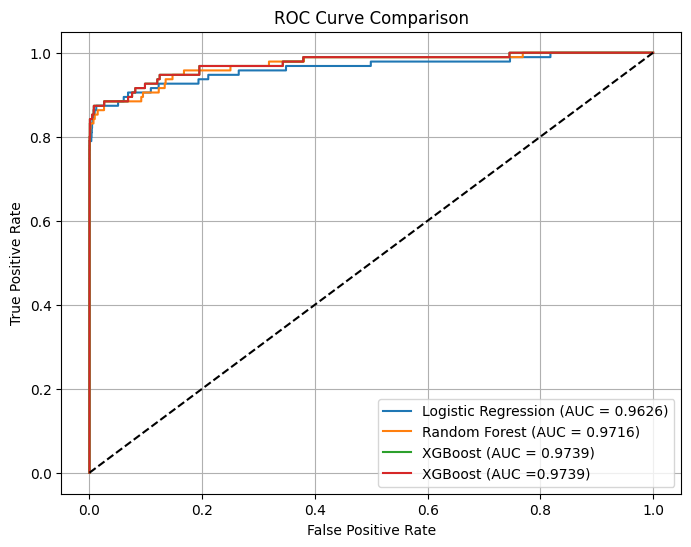

In [52]:

log_proba = pipeline.predict_proba(x_test)[:, 1]
rf_proba  = rf_model.predict_proba(x_test)[:, 1]
xgb_proba = xgb_model.predict_proba(x_test)[:, 1]
y_proba = xgb_model.predict_proba(x_test)[:,1]


auc_log = roc_auc_score(y_test, log_proba)
auc_rf  = roc_auc_score(y_test, rf_proba)
auc_xgb = roc_auc_score(y_test, xgb_proba)
auc_xgb_thresh=roc_auc_score(y_test,y_proba)

print("AUC Scores:")
print("Logistic Regression:", auc_log)
print("Random Forest:", auc_rf)
print("XGBoost:", auc_xgb)
print("XGBoost (Thresh = 0.30)",auc_xgb_thresh)

fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
fpr_rf, tpr_rf, _   = roc_curve(y_test, rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
fpr_xgb_th,tpr_xgb_th,_=roc_curve(y_test,y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.4f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.4f})")
plt.plot(fpr_xgb_th,tpr_xgb_th,label=f"XGBoost (AUC ={auc_xgb_thresh:.4f})")
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


# Model AUC Comparison Chart


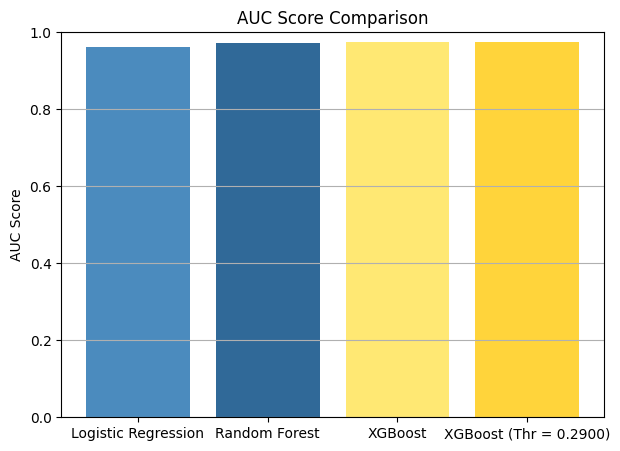

In [53]:
colors = ["#4B8BBE", "#306998", "#FFE873", "#FFD43B"] 

plt.figure(figsize=(7,5))
models = ["Logistic Regression", "Random Forest", "XGBoost","XGBoost (Thr = 0.2900)"]
auc_scores = [auc_log, auc_rf, auc_xgb,auc_xgb_thresh]

plt.bar(models, auc_scores,color = colors)
plt.title("AUC Score Comparison")
plt.ylabel("AUC Score")
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()


# Model Performance: Precision–Recall Visualization

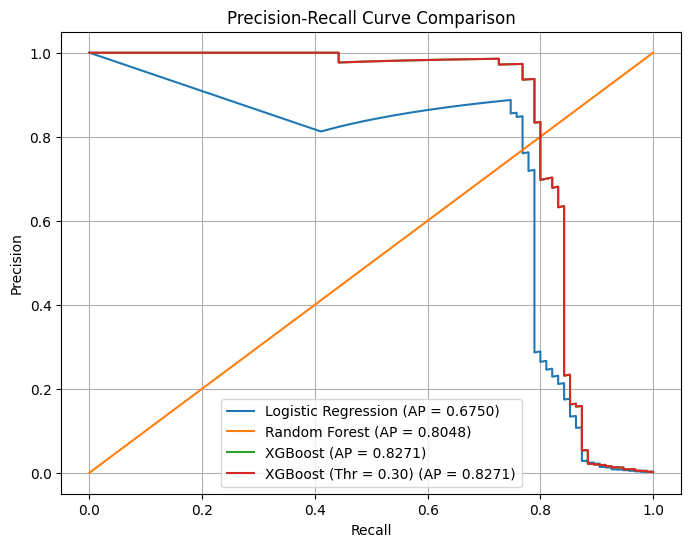

In [54]:

prec_log, rec_log, _ = precision_recall_curve(y_test, log_proba)
prec_rf, rec_rf, _   = precision_recall_curve(y_test, rf_proba)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, xgb_proba)
prec_xgb_thr, rec_xgb_thr, _ = precision_recall_curve(y_test, y_proba)


ap_log = average_precision_score(y_test, log_proba)
ap_rf  = average_precision_score(y_test, rf_proba)
ap_xgb = average_precision_score(y_test, xgb_proba)
ap_xgb_thr = average_precision_score(y_test, y_proba)


plt.figure(figsize=(8,6))
plt.plot(rec_log, prec_log, label=f"Logistic Regression (AP = {ap_log:.4f})")
plt.plot(rec_rf, rec_rf, label=f"Random Forest (AP = {ap_rf:.4f})")
plt.plot(rec_xgb, prec_xgb, label=f"XGBoost (AP = {ap_xgb:.4f})")
plt.plot(rec_xgb_thr,prec_xgb_thr,label=f"XGBoost (Thr = 0.30) (AP = {ap_xgb_thr:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

# Final Comparison Table

In [55]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost","XGBoost Tuned (Thr = 0.2900)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred),
        accuracy_score(y_test, y_pred_thresh)
    ],
    "Precision": [
        precision_score(y_test, y_pred),
        precision_score(y_test, rf_pred),
        precision_score(y_test, xgb_pred),
        precision_score(y_test, y_pred_thresh)
    ],
    "Recall": [
        recall_score(y_test, y_pred),
        recall_score(y_test, rf_pred),
        recall_score(y_test, xgb_pred),
        recall_score(y_test, y_pred_thresh)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred),
        f1_score(y_test, rf_pred),
        f1_score(y_test, xgb_pred),
        f1_score(y_test, y_pred_thresh)
    ],
    "AUC-ROC": [
        roc_auc_score(y_test, y_proba),
        roc_auc_score(y_test, rf_proba),
        roc_auc_score(y_test, xgb_proba),
        roc_auc_score(y_test, y_proba) 
        ],
    "Average Precision (PR-AUC)": [
        average_precision_score(y_test, y_proba),
        average_precision_score(y_test, rf_proba),
        average_precision_score(y_test, xgb_proba),
        average_precision_score(y_test, y_proba)
    ]
})

print("\n📌 Final Model Comparison Table:\n")
display(comparison_df)



📌 Final Model Comparison Table:



,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC,Average Precision (PR-AUC)
0,Logistic Regression,0.973672,0.053035,0.873684,0.100000,0.973939,0.827108
1,Random Forest,0.999542,0.985915,0.736842,0.843373,0.971562,0.804802
2,XGBoost,0.999507,0.971831,0.726316,0.831325,0.973939,0.827108
3,XGBoost Tuned (Thr = 0.2900),0.999577,0.973333,0.768421,0.858824,0.973939,0.827108


| Model                | Accuracy | Precision | Recall | F1 Score | AUC-ROC | PR-AUC |
|----------------------|----------|-----------|--------|----------|---------|--------|
| Logistic Regression  | 0.9737   | 0.0530    | 0.8737 | 0.1000   | 0.9739  | 0.8271 |
| Random Forest        | 0.9995   | 0.9859    | 0.7368 | 0.8433   | 0.9716  | 0.8048 |
| XGBoost              | 0.9995   | 0.9718    | 0.7263 | 0.8313   | 0.9739  | 0.8271 |
| XGBoost(Thr = 0.2900)| 0.9996   | 0.97333   | 0.77   | 0.86     | 0.9739  | 0.8271 |


# Model Saving

In [56]:
joblib.dump(xgb_model, "xgb_Champion_model.pkl")

print("Model saved successfully!")


Model saved successfully!


#  Save final full pipeline (scaler + SMOTE + model)

In [57]:

joblib.dump(pipeline, "pipeline.pkl")
print("Pipeline Model is Saved")

Pipeline Model is Saved
